# Introduction

**Package Installations**

Intalação dos pacotes

**Import Libraries**

Importação de bibliotecas / pacotes

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from scipy import stats, io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**Seeds**

In [224]:
seed = 2

**Loading data**

Carregamento dos dados.

In [58]:
data_path = 's3://resultados-ifsp-1000/JTemp35k-teresina.csv'
data = pd.read_csv(data_path)
data

,Irradiance,Ta,f_sw,Device,Tj,delta_Tj
0,0.000000e+00,27.608333,10000,IGBT,29.081295,1.561258
1,0.000000e+00,27.179167,10000,IGBT,28.001805,0.870981
2,0.000000e+00,26.479123,10000,IGBT,27.179445,0.740504
3,0.000000e+00,26.091629,10000,IGBT,26.556674,0.493527
4,0.000000e+00,25.845771,10000,IGBT,26.160277,0.331715
...,...,...,...,...,...,...
35035,3.501382e+02,28.741923,15000,MOSFET,65.811249,34.005698
35036,5.696270e+01,28.483462,15000,MOSFET,54.522737,27.395597
35037,1.252388e-01,28.366721,15000,MOSFET,38.075751,17.339361
35038,8.684164e-08,28.316695,15000,MOSFET,30.786107,3.479579


**Converting Device in Boolean**

Conversão da variável Device de string para boolean.

In [59]:
df = data.copy()
boolean = {'IGBT': 0, 'MOSFET': 1}
df['Device'] = df['Device'].map(boolean)
df

,Irradiance,Ta,f_sw,Device,Tj,delta_Tj
0,0.000000e+00,27.608333,10000,0,29.081295,1.561258
1,0.000000e+00,27.179167,10000,0,28.001805,0.870981
2,0.000000e+00,26.479123,10000,0,27.179445,0.740504
3,0.000000e+00,26.091629,10000,0,26.556674,0.493527
4,0.000000e+00,25.845771,10000,0,26.160277,0.331715
...,...,...,...,...,...,...
35035,3.501382e+02,28.741923,15000,1,65.811249,34.005698
35036,5.696270e+01,28.483462,15000,1,54.522737,27.395597
35037,1.252388e-01,28.366721,15000,1,38.075751,17.339361
35038,8.684164e-08,28.316695,15000,1,30.786107,3.479579


**IN and OUT Labels**

Variáveis de entrada e saída no dataframe.

In [60]:
in_labels  = ['Irradiance',	'Ta',	'f_sw',	'Device']
out_labels = ['Tj',	'delta_Tj']

# Stats

In [61]:
df.describe()

,Irradiance,Ta,f_sw,Device,Tj,delta_Tj
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,270.601077,27.330193,12500.000000,0.500000,46.594321,13.589103
std,333.312860,3.158767,2500.035674,0.500007,21.909354,13.409781
min,0.000000,21.062460,10000.000000,0.000000,21.067848,0.000037
25%,0.000000,24.900000,10000.000000,0.000000,26.054064,0.582223
50%,33.121643,26.816913,12500.000000,0.500000,36.199864,10.687822
75%,606.047147,29.345773,15000.000000,1.000000,67.896101,26.015854
max,987.220219,37.516851,15000.000000,1.000000,90.652982,49.965515


**Max-Min** $\Delta T_j$

In [62]:
from IPython.display import display, Latex, Math

delta_Tj_max = [df[out_labels[1]][df['Device']==0].max(), df[out_labels[1]][df['Device']==1].max()]
delta_Tj_min = [df[out_labels[1]][df['Device']==0].min(), df[out_labels[1]][df['Device']==0].min()]

display(Latex(f'Max-Min:  \Delta Tj'))
print(tabulate([['Max', *delta_Tj_max],
                ['Min', *delta_Tj_min]], headers = ['', 'IGBT', 'MOSFET']))

<IPython.core.display.Latex object>

         IGBT    MOSFET
---  --------  --------
Max  49.9464   49.9655
Min   3.7e-05   3.7e-05


**Boxplots Functions**

In [63]:
# function to make annotations on boxplot 
def boxplot_text(ax, box_width, data):

  # annotation: values
  values = [min(data),
            np.quantile(data, 0.25),
            np.median(data),
            np.quantile(data, 0.75),
            max(data)]

  # annotation: position in x axis 
  p1 = -0.02; p2 = .70 
  p = [p1,p2,p2,p2,p1]
    
  x = -box_width/2

  for i, y in enumerate(values):
    ax.annotate('%.2f' % y, (x,y),
                xytext=(x+p[i], y), textcoords='data',
                va='center', ha='right')

# function to make boxplots 
def box_subplot(ax, box_width, data, yrange, ylabel):
  sns.boxplot(ax=ax, data=data, width=box_width).set(yticks=yrange, xticklabels=[]);
  ax.set_ylabel(ylabel, rotation="horizontal")
  ax.yaxis.set_label_coords(-0.05,1.02)

  boxplot_text(ax, box_width, data)

**Boxplots das saídas**

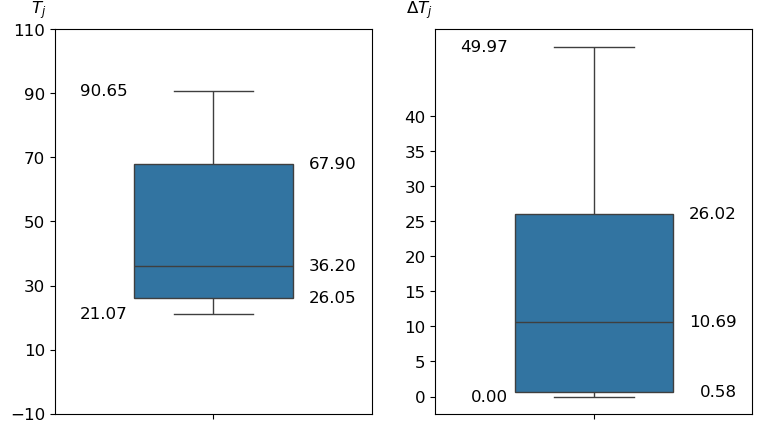

In [64]:
box_width=0.5

plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(1,2)
fig.set_facecolor('white')
# fig.suptitle('Output Variables Boxplots')

box_subplot(ax[0], box_width, df[out_labels[0]], yrange=range(-10,111,20), ylabel='$T_{j}$')

box_subplot(ax[1], box_width, df[out_labels[1]], yrange=range(0,41,5), ylabel='${\Delta}T_j$')

plt.show()

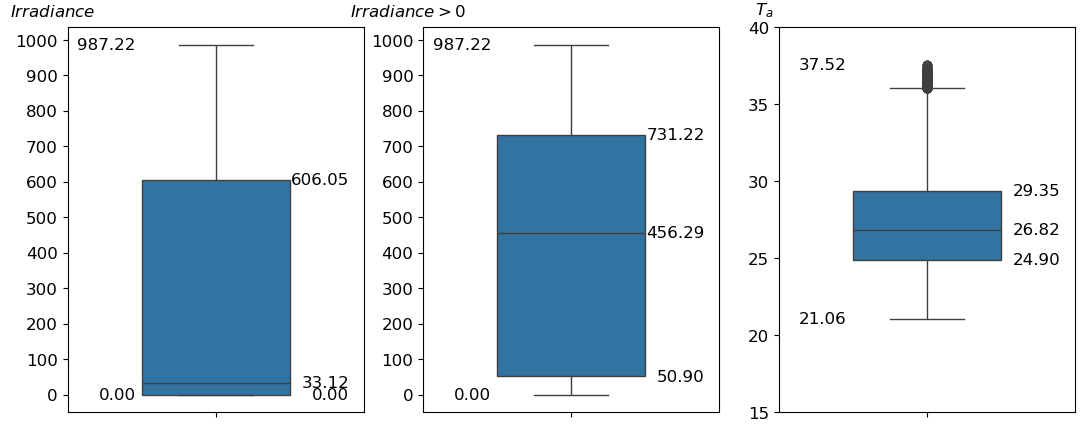

In [65]:
box_width=0.5

plt.rcParams['figure.figsize'] = [13, 5]
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(1,3)
fig.set_facecolor('white')
# fig.suptitle('Output Variables Boxplots')

box_subplot(ax[0], box_width, df[in_labels[0]], yrange=range(0,1001,100), ylabel='$Irradiance$')

box_subplot(ax[1], box_width, df[in_labels[0]][df[in_labels[0]]>0], yrange=range(0,1001,100), ylabel='$Irradiance>0$')

box_subplot(ax[2], box_width, df[in_labels[1]], yrange=range(15,41,5), ylabel='$T_a$')

plt.show()

**Correlation Matrix**

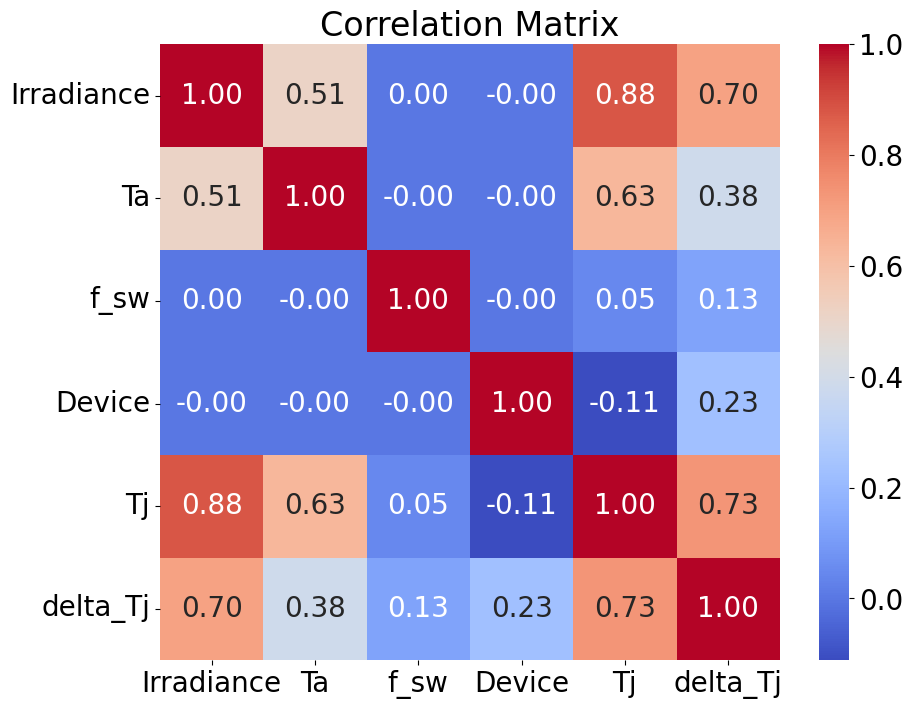

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.yticks(rotation=0) 
plt.title('Correlation Matrix')
plt.show()

**Correlation**

In [67]:
# function to calculate correlation
def corrcoef(x, y, mode = 'pearson'):

  if x.shape[0] > 1 and x.shape[1] > 1:
    x_dim = x.shape[1]
  else:
    x_dim = 1

  if y.shape[0] > 1 and y.shape[1] > 1:
    y_dim = y.shape[1]
  else:
    y_dim = 1

  coef   = np.empty((x_dim, y_dim))
  pvalue = np.empty((x_dim, y_dim))
  x_cols = list(x)
  y_cols = list(y)

  for i in range(x_dim):
     for j in range(y_dim):

      if mode == 'spearman':
         coef[i,j], pvalue[i,j] = stats.spearmanr(x[x_cols[i]], y[y_cols[j]])

      else:
        coef[i,j], pvalue[i,j] = stats.pearsonr(x[x_cols[i]], y[y_cols[j]])

  return {'coefficient': coef,
          'pvalue': pvalue}

In [68]:
# Correlations between inputs and outputs
pearson  = corrcoef(df[in_labels], df[out_labels])

np.set_printoptions(suppress=True, precision=4)

# pearson['keys']  = ['[x0-y0 x0-y1]', '[x1-y0 x1-y1]', '[x2-y0 x2-y1]', '[x3-y0 x3-y1]']
headers = ['Coefficient','p-values','lines']

print('PEARSON CORRELATION COEFFICIENT')
# print(tabulate(pearson, headers=headers))
print(pearson)

PEARSON CORRELATION COEFFICIENT
{'coefficient': array([[ 0.8818,  0.6978],
       [ 0.6332,  0.3841],
       [ 0.0488,  0.1261],
       [-0.1115,  0.2292]]), 'pvalue': array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])}


**Correlation Plots**

In [69]:
# correlation plot function (continuous data)
def corr_subplot(ax, x, y, xlabel='', ylabel='', title=''):

  # axis labels (ticks)
  # xticks = list(np.unique(x))

  # axis limits
  delta_x = 0.05 * (np.max(x) - np.min(x))
  delta_y = 0.05 * (np.max(y) - np.min(y))

  xLim = (np.min(x) - delta_x, np.max(x) + delta_x)
  yLim = (np.min(y) - delta_y, np.max(y) + delta_y)

  # stats lines
  # mean = [y[x == i].mean() for i in xticks]
  # max  = [y[x == i].max()  for i in xticks]
  # min  = [y[x == i].min()  for i in xticks]

  # plot
  ax.plot(x, y, '.', linewidth=2.0, color = 'b')
  # ax.plot(xticks, mean, '--', linewidth=1.0, color = 'r')
  # ax.plot(xticks, max,  '--', linewidth=1.0, color = 'r')
  # ax.plot(xticks, min,  '--', linewidth=1.0, color = 'r')

  # configurações ax
  ax.title.set_text(title)
  ax.set(
      xlim = xLim, xlabel = xlabel, # xticks = xticks,
      ylim = yLim, ylabel = ylabel
        )

  ax.grid()

In [70]:
# correlation plot function (non-continuous data)
def corr_subplot2(ax, x, y, xlabel='', ylabel='', title=''):

  # axis labels (ticks)
  xticks = list(np.unique(x))

  # axis limits
  delta_x = 0.05 * (np.max(x) - np.min(x))
  delta_y = 0.05 * (np.max(y) - np.min(y))

  xLim = (np.min(x) - delta_x, np.max(x) + delta_x)
  yLim = (np.min(y) - delta_y, np.max(y) + delta_y)

  # stats lines
  mean = [y[x == i].mean() for i in xticks]
  max  = [y[x == i].max()  for i in xticks]
  min  = [y[x == i].min()  for i in xticks]

  # plot
  ax.plot(x, y, '.', linewidth=2.0, color = 'b')
  ax.plot(xticks, mean, '--', linewidth=1.0, color = 'r')
  ax.plot(xticks, max,  '--', linewidth=1.0, color = 'r')
  ax.plot(xticks, min,  '--', linewidth=1.0, color = 'r')

  # configurações ax
  ax.title.set_text(title)
  ax.set(
      xlim = xLim, xlabel = xlabel, # xticks = xticks,
      ylim = yLim, ylabel = ylabel
        )

  ax.grid()

In [71]:
# correlation plot (grouping corr_subplot and corr_subplot2)
def corr_plot(data_x, data_y, xlabels, ylabels):

  # tamanho dos vetores de dados
  size_x = data_x.shape
  size_y = data_y.shape

  # coeficeinte de correlação
  # pearson  = corrcoef(data_x, data_y)

  # plot parameters
  plt.rcParams['figure.figsize'] = [20, 20]
  plt.rcParams['font.size'] = 20

  fig, ax = plt.subplots(size_x[1], size_y[1])
  fig.tight_layout(pad=5.0)

  for i in range(size_x[1]):
    for j in range(size_y[1]):
      title = 'Pearson: r = {:.2f} (p = {:.2f})'.format(pearson['coefficient'][i,j],
                                                        pearson['pvalue'][i,j])
      x_cols = list(data_x)
      y_cols = list(data_y)

      if i in [0,1]:
        corr_subplot(ax[i,j],  data_x[x_cols[i]], data_y[y_cols[j]],
                    xlabel=xlabels[i], ylabel=ylabels[j],
                    title = title
                    )
      else:
        corr_subplot2(ax[i,j],  data_x[x_cols[i]], data_y[y_cols[j]],
                    xlabel=xlabels[i], ylabel=ylabels[j],
                    title = title
                    )

  plt.show() # mostrar plote

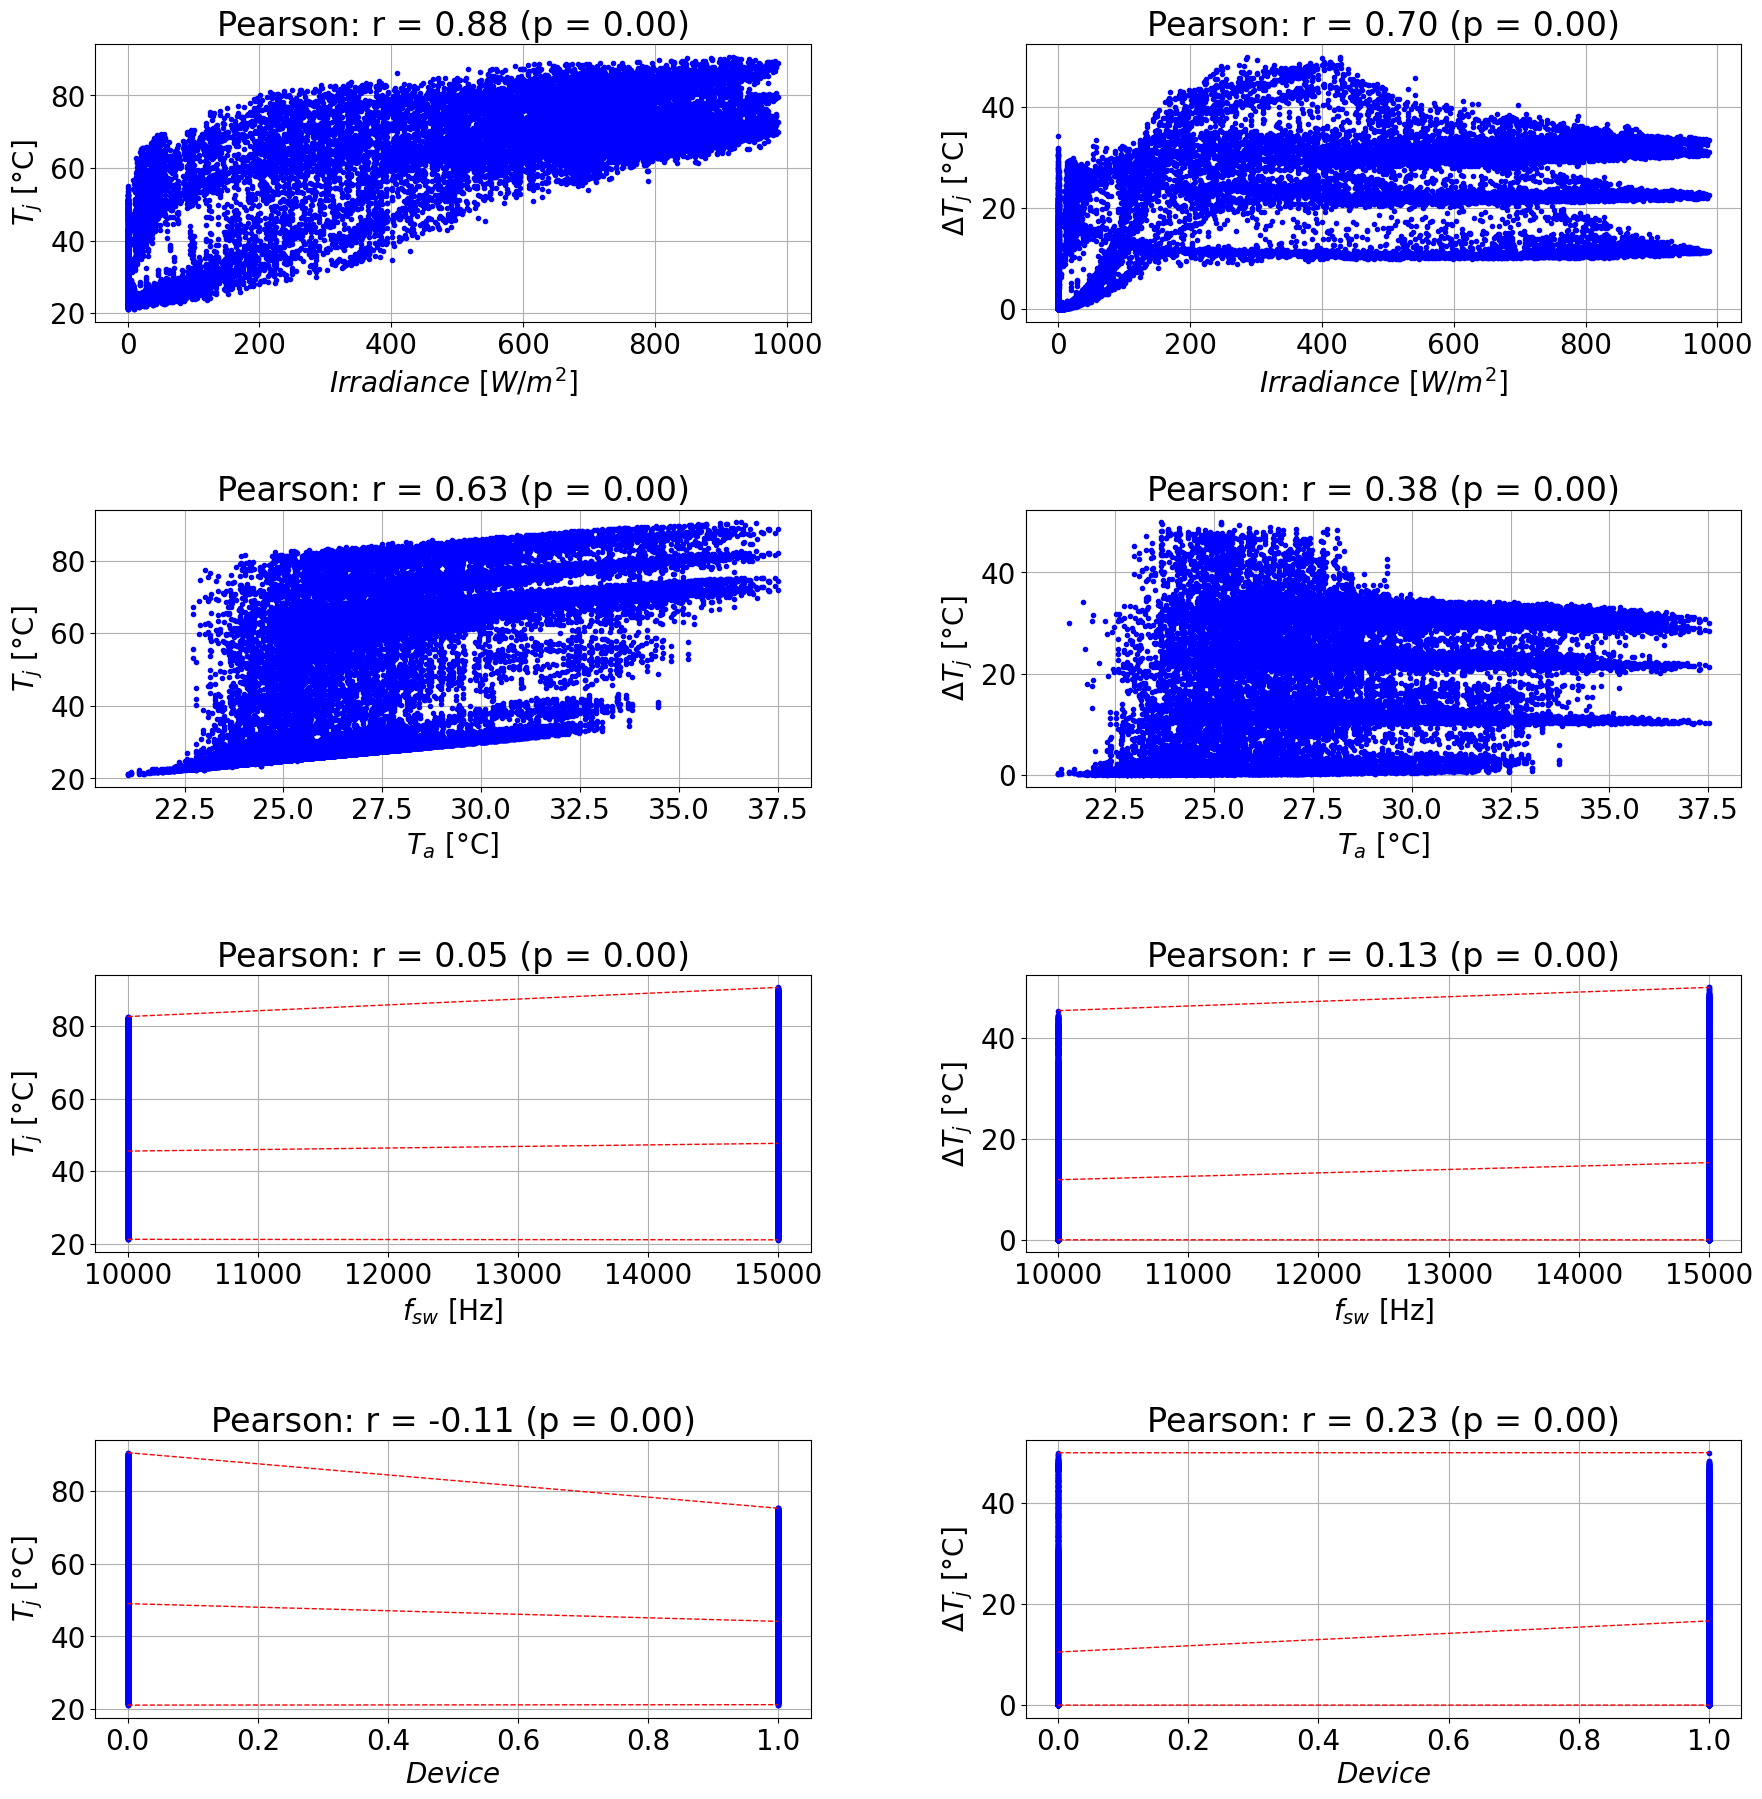

In [72]:
# keys
xlabels = ['$Irradiance$ [$W/m^2$]', '$T_a$ [°C]', '$f_{sw}$ [Hz]', '$Device$']
ylabels = ['$T_{j}$ [°C]', '${\Delta}T_j$ [°C]']

# correlation plot
corr_plot(df[in_labels], df[out_labels], xlabels, ylabels)

# Pre-processing

**Normalization**

In [79]:
def normalizate(df, new_range=[-1,1], old_range=None):

  # new range
  # new_range = np.array(new_range)
  new_min = new_range[0]
  new_max = new_range[1]

  if old_range is None:
    old_range = [df.min(), df.max()]

  old_min = old_range[0]
  old_max = old_range[1]

  normalized_df = (df - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

  return normalized_df, old_range

In [80]:
new_range = [0,1]
norm_df, old_range = normalizate(df, new_range=new_range)

old_range

[Irradiance        0.000000
 Ta               21.062460
 f_sw          10000.000000
 Device            0.000000
 Tj               21.067848
 delta_Tj          0.000037
 dtype: float64,
 Irradiance      987.220219
 Ta               37.516851
 f_sw          15000.000000
 Device            1.000000
 Tj               90.652982
 delta_Tj         49.965515
 dtype: float64]

In [85]:
# show normalizated df
norm_df

,Irradiance,Ta,f_sw,Device,Tj,delta_Tj
0,0.000000e+00,0.397819,0.0,0.0,0.115160,0.031246
1,0.000000e+00,0.371737,0.0,0.0,0.099647,0.017431
2,0.000000e+00,0.329193,0.0,0.0,0.087829,0.014820
3,0.000000e+00,0.305643,0.0,0.0,0.078879,0.009877
4,0.000000e+00,0.290701,0.0,0.0,0.073183,0.006638
...,...,...,...,...,...,...
35035,3.546708e-01,0.466712,1.0,1.0,0.643002,0.680583
35036,5.770010e-02,0.451004,1.0,1.0,0.480776,0.548290
35037,1.268601e-04,0.443910,1.0,1.0,0.244419,0.347026
35038,8.796582e-11,0.440869,1.0,1.0,0.139660,0.069639


**Split Train / Test**

In [86]:
data = dict()

# Train / test split of IGBT's dataset with Device attribute
data['IGBT'] = train_test_split(
        norm_df[in_labels][norm_df['Device']==0],
        norm_df[out_labels][norm_df['Device']==0],
        test_size=0.2,
        random_state=seed)

# Train / test split MOSFET's dataset with Device attribute
data['MOSFET'] = train_test_split(
    norm_df[in_labels][norm_df['Device']==1],
    norm_df[out_labels][norm_df['Device']==1],
    test_size=0.2,
    random_state=seed)

# IGBT and MOSFET's dataset from IGBT's and MOSFET's datasets (WITH Device attribute)
data['ALLd'] = [ [] for _ in range(len(data['IGBT']))]
for i in range(len(data['ALLd'])):
  data['ALLd'][i] = pd.concat([data['IGBT'][i], data['MOSFET'][i]])

# Remove Device attribute from IGBT's and MOSFET's datasets
for i in [0,1]:
  del data['IGBT'][i][in_labels[3]]     # removing Device attribute in IGBT's dataset
  del data['MOSFET'][i][in_labels[3]]   # removing Device attribute in MOSFET's dataset

# IGBT and MOSFET's dataset from IGBT's and MOSFET's datasets (WITHOUT Device attribute)
data['ALL'] = [ [] for _ in range(len(data['IGBT']))]
for i in range(len(data['ALL'])):
  data['ALL'][i] = pd.concat([data['IGBT'][i], data['MOSFET'][i]])

# Linear Regression

4 Modelos:
* IGBT = only data with IGBT as switch
* MOSFET = only data with MOSFET as switch
* ALL = IGBT + MOSFET (without device attribute)
* ALLd = IGBT + MOSFET (with device attribute)

## Train and Test

**Declaring dicts with empty values**

In [230]:
str_models = ['IGBT', 'MOSFET', 'ALL', 'ALLd']
  # IGBT    = only data with IGBT as switch
  # MOSFET  = only data with MOSFET as switch
  # ALL     = IGBT + MOSFET (without device attribute)
  # ALLd    = IGBT + MOSFET (with device attribute)

# dict() to save MSE
linear_mse   = {
    'labels'  : ['Mean', *out_labels],            # labels for each value of the other dictionary keys: [Mean, Tj, Delta_Tj]
    **{k: np.zeros(3) for k in str_models}      # empty array for each model, size: (3,)
}

# dict() to save R2 score
linear_r2    = {
    'labels'  : ['Mean', *out_labels],          # labels for each value of the other dictionary keys: [Mean, Tj, Delta_Tj]
    **{k: np.zeros(3) for k in str_models}      # empty array for each model, size: (3,)
}

# dict() to save each model coefficients (T_j)
linear_coef1  = {
    'labels'  : ['Indep', 'Irradiance', 'Ta', 'f_sw', 'Device'],                # labels for each value of the other dictionary keys: [Coefficients, Independent Term]
    **{k: [[]]*2 for k in str_models}          # list of empty lists for each model, size: (2,)
}

# dict() to save each model coefficients (Delta T_j)
linear_coef2 = {
    'labels'  : ['Indep', 'Irradiance', 'Ta', 'f_sw', 'Device'],                # labels for each value of the other dictionary keys: [Coefficients, Independent Term]
    **{k: [[]]*2 for k in str_models}          # list of empty lists for each model, size: (2,)
}

# dict() to save each model
linear_model = {
    **{k: [] for k in str_models}              # empty list for each model, size: (1,)
}

**Linear Model Function** (depending only by used data)

In [231]:
def linear_function(data):

  train_x = data[0]
  test_x  = data[1]
  train_y = data[2]
  test_y  = data[3]

  # model
  linear_model = LinearRegression().fit(train_x, train_y)

  # predicts
  linear_predicts = linear_model.predict(test_x)

  # MSE
  linear_mse = [
      mse(test_y, linear_predicts),
      mse(test_y[out_labels[0]],  linear_predicts[:,0]),
      mse(test_y[out_labels[1]], linear_predicts[:,1])
  ]

  # R2
  linear_r2 = [
      r2_score(test_y, linear_predicts),
      r2_score(test_y[out_labels[0]], linear_predicts[:,0]),
      r2_score(test_y[out_labels[1]], linear_predicts[:,1])
  ]

  # coeficients
  linear_coef1 = [linear_model.intercept_[0]] + linear_model.coef_[0].tolist()
  linear_coef2 = [linear_model.intercept_[1]] + linear_model.coef_[1].tolist()
    
  return linear_model, linear_mse, linear_r2, linear_coef1, linear_coef2

**Models**

In [232]:
# Run all linear models

for k in str_models:
  linear_model[k], linear_mse[k], linear_r2[k], linear_coef1[k], linear_coef2[k] = linear_function(data[k])

**Results**

[tabulate](https://pyneng.readthedocs.io/en/latest/book/12_useful_modules/tabulate.html)

In [233]:
# MSE
print('MSE\n')
print(tabulate(linear_mse, headers=linear_mse.keys(), tablefmt='pipe', stralign='center'))

MSE

|  labels  |      IGBT |     MOSFET |       ALL |      ALLd |
|:--------:|----------:|-----------:|----------:|----------:|
|   Mean   | 0.0212628 | 0.0196065  | 0.025746  | 0.023212  |
|    Tj    | 0.0196794 | 0.00972368 | 0.0170396 | 0.0158044 |
| delta_Tj | 0.0228463 | 0.0294894  | 0.0344525 | 0.0306196 |


In [234]:
# R2 score
print('R2 Score\n')
print(tabulate(linear_r2, headers=linear_r2.keys(), tablefmt='pipe', stralign='center'))

R2 Score

|  labels  |     IGBT |   MOSFET |      ALL |     ALLd |
|:--------:|---------:|---------:|---------:|---------:|
|   Mean   | 0.640571 | 0.776212 | 0.671151 | 0.70444  |
|    Tj    | 0.839867 | 0.870351 | 0.829914 | 0.842243 |
| delta_Tj | 0.441274 | 0.682073 | 0.512389 | 0.566637 |


In [235]:
# Model Coefficients
print('Model Coefficients $T_j$')
print('Obs.: Variável de entrada Device é usada apenas no modelo Alld\n')
print(tabulate(linear_coef1, headers=linear_coef.keys(), tablefmt='pipe', stralign='center'))

Model Coefficients $T_j$
Obs.: Variável de entrada Device é usada apenas no modelo Alld

|   labels   |        IGBT |    MOSFET |        ALL |       ALLd |
|:----------:|------------:|----------:|-----------:|-----------:|
|   Indep    | -0.00443543 | 0.0146468 | 0.00510567 |  0.0401971 |
| Irradiance |  0.785289   | 0.624488  | 0.704889   |  0.704889  |
|     Ta     |  0.44469    | 0.361109  | 0.402899   |  0.402899  |
|    f_sw    |  0.0448356  | 0.0179449 | 0.0313902  |  0.0313902 |
|   Device   |             |           |            | -0.070183  |


In [236]:
# Model Coefficients
print('Model Coefficients $\Delta T_j$')
print('Obs.: Variável de entrada Device é usada apenas no modelo Alld\n')
print(tabulate(linear_coef2, headers=linear_coef.keys(), tablefmt='pipe', stralign='center'))

Model Coefficients $\Delta T_j$
Obs.: Variável de entrada Device é usada apenas no modelo Alld

|   labels   |      IGBT |    MOSFET |       ALL |      ALLd |
|:----------:|----------:|----------:|----------:|----------:|
|   Indep    | 0.0410624 | 0.104062  | 0.0725623 | 0.0111415 |
| Irradiance | 0.353079  | 0.729937  | 0.541508  | 0.541508  |
|     Ta     | 0.053542  | 0.043181  | 0.0483615 | 0.0483615 |
|    f_sw    | 0.107462  | 0.0287055 | 0.0680837 | 0.0680837 |
|   Device   |           |           |           | 0.122842  |


## Single Sample Test

**Single Sample Test Function**

In [174]:
# old_range (pre normalization) only to inputs (except: device)
in_range  = [old_range[0][in_labels[0:3]],
             old_range[1][in_labels[0:3]]]

# old_range (pre normalization) only to inputs (with device)
in_range_d  = [old_range[0][in_labels],
               old_range[1][in_labels]]

# old_range (pre normalization) only to outputs
out_range = [old_range[0][out_labels],
             old_range[1][out_labels]]

In [175]:
# test sample
def test_sample(model, sample, in_range, out_range, new_range):

  # sample
  in_sample = sample[0]
  out_sample = sample[1]

  # normalize sample
  norm_sample, _ = normalizate(in_sample, new_range=new_range, old_range=in_range)
  print(norm_sample)

  # predict
  preds = model.predict(np.array(norm_sample).reshape(1,-1))
  preds = pd.DataFrame(preds, columns = out_labels)

  # preds denormalized
  denorm_preds, _ = normalizate(preds, new_range=out_range, old_range=new_range)

  # ERRO
  out_sample = out_sample.reset_index()
  del out_sample['index']
  mse = (out_sample - denorm_preds)

  print(    'Sample Inputs ------------------')
  print(in_sample.to_string(index=False))

  print('\n\nNormalized Sample Inputs -------')
  print(norm_sample.to_string(index=False))

  print('\n\nNormalized Predict Outputs------')
  print(preds.to_string(index=False))

  print('\n\nDenormalized Predict Outputs ---')
  print(denorm_preds.to_string(index=False))

  print('\n\nExpected Outputs ---------------')
  print(out_sample.to_string(index=False))

  print('\n\nERRO ----------------------------')
  print(mse.to_string(index=False))

**Sample 35035**

In [176]:
s = 35035
model = linear_model['ALLd']

sample = [df[in_labels[0:4]].iloc[s:s+1], df[out_labels].iloc[s:s+1]]
test_sample(model = model, sample=sample, in_range=in_range_d, out_range=out_range, new_range=new_range)


       Irradiance        Ta  f_sw  Device
35035    0.354671  0.466712   1.0     1.0
Sample Inputs ------------------
 Irradiance        Ta  f_sw  Device
 350.138211 28.741923 15000       1


Normalized Sample Inputs -------
 Irradiance       Ta  f_sw  Device
   0.354671 0.466712   1.0     1.0


Normalized Predict Outputs------
      Tj  delta_Tj
0.439446  0.416695


Denormalized Predict Outputs ---
       Tj  delta_Tj
51.646747 20.820394


Expected Outputs ---------------
       Tj  delta_Tj
65.811249 34.005698


ERRO ----------------------------
       Tj  delta_Tj
14.164502 13.185304


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Sample 35027**

In [177]:
s = 35027
model = linear_model['ALLd']

sample = [df[in_labels[0:4]].iloc[s:s+1], df[out_labels].iloc[s:s+1]]
test_sample(model = model, sample=sample, in_range=in_range_d, out_range=out_range, new_range=new_range)

       Irradiance        Ta  f_sw  Device
35027    0.738247  0.375522   1.0     1.0
Sample Inputs ------------------
 Irradiance        Ta  f_sw  Device
 728.812249 27.241453 15000       1


Normalized Sample Inputs -------
 Irradiance       Ta  f_sw  Device
   0.738247 0.375522   1.0     1.0


Normalized Predict Outputs------
      Tj  delta_Tj
0.673084  0.619994


Denormalized Predict Outputs ---
       Tj  delta_Tj
67.904488 30.978347


Expected Outputs ---------------
       Tj  delta_Tj
64.464095 35.976853


ERRO ----------------------------
       Tj  delta_Tj
-3.440393  4.998506


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Decision Tree

**Declaring dicts with empty values**

In [227]:
# str_models = ['IGBT', 'MOSFET', 'ALL', 'ALLd']
  # IGBT    = only data with IGBT as switch
  # MOSFET  = only data with MOSFET as switch
  # ALL     = IGBT + MOSFET (without device attribute)
  # ALLd    = IGBT + MOSFET (with device attribute)

# dict() to save MSE
tree_mse = {
    'labels'  : ['Mean', *out_labels],            # labels for each value of the other dictionary keys: [Mean, Tj, Delta_Tj]
    **{k: np.zeros(3) for k in str_models}      # empty array for each model, size: (3,)
}

# dict() to save R2 score
tree_r2 = {
    'labels'  : ['Mean', *out_labels],          # labels for each value of the other dictionary keys: [Mean, Tj, Delta_Tj]
    **{k: np.zeros(3) for k in str_models}      # empty array for each model, size: (3,)
}

# dict() to save each model
tree_model = {
    **{k: [] for k in str_models}              # empty list for each model, size: (1,)
}

**Data for Tree**

In [228]:
# data

train_x, train_y, test_x, test_y = [ [] for _ in range(4)]

for i, k in enumerate(str_models):
  train_x.append(data[k][0])
  test_x.append(data[k][1])
  train_y.append(data[k][2])
  test_y.append(data[k][3])

In [229]:
# params
tree_deeps = [3, 5, 10, 20]

for depth in tree_deeps:
    print(f'\n----------------------- DEPTH = {depth} -----------------------')
    
    for i in range(len(str_models)):
        # create a decision tree object
        tree = DecisionTreeRegressor(max_depth=depth, random_state = seed)
        
        # fit the regressor with X and Y data
        tree.fit(train_x[i], train_y[i])
        
        # test preds
        tree_preds = tree.predict(test_x[i])
        
        # MSE
        tree_mse[str_models[i]][0] = mse(test_y[i], tree_preds)
        tree_mse[str_models[i]][1] = mse(test_y[i][out_labels[0]], tree_preds[:,0])
        tree_mse[str_models[i]][2] = mse(test_y[i][out_labels[1]], tree_preds[:,1])
        
        # R2
        tree_r2[str_models[i]][0] = r2_score(test_y[i], tree_preds)
        tree_r2[str_models[i]][1] = r2_score(test_y[i][out_labels[0]], tree_preds[:,0])
        tree_r2[str_models[i]][2] = r2_score(test_y[i][out_labels[1]], tree_preds[:,1])
    
    print('MSE')
    print(tabulate(tree_mse, headers=tree_mse.keys()))
    print('\n')
    
    print('R2')
    print(tabulate(tree_r2, headers=tree_r2.keys()))
    print('\n\n')


----------------------- DEPTH = 3 -----------------------
MSE
labels          IGBT      MOSFET        ALL        ALLd
--------  ----------  ----------  ---------  ----------
Mean      0.0101588   0.00623962  0.0140548  0.00991741
Tj        0.0122985   0.00506907  0.0106965  0.0117289
delta_Tj  0.00801913  0.00741017  0.0174132  0.00810597


R2
labels        IGBT    MOSFET       ALL      ALLd
--------  --------  --------  --------  --------
Mean      0.851905  0.926261  0.823389  0.8841
Tj        0.899926  0.932412  0.893229  0.882925
delta_Tj  0.803885  0.92011   0.753549  0.885275




----------------------- DEPTH = 5 -----------------------
MSE
labels          IGBT      MOSFET         ALL        ALLd
--------  ----------  ----------  ----------  ----------
Mean      0.00682403  0.00431088  0.0118069   0.00615595
Tj        0.0074168   0.00306774  0.00816785  0.00593265
delta_Tj  0.00623127  0.00555402  0.015446    0.00637924


R2
labels        IGBT    MOSFET       ALL      ALLd
-----

# MLP

**MLP**

In [216]:
# str_models = ['IGBT', 'MOSFET', 'ALL', 'ALLd']
  # IGBT    = only data with IGBT as switch
  # MOSFET  = only data with MOSFET as switch
  # ALL     = IGBT + MOSFET (without device attribute)
  # ALLd    = IGBT + MOSFET (with device attribute)

# dict() to save MSE
mlp_mse = {
    'labels'  : ['Mean', *out_labels],            # labels for each value of the other dictionary keys: [Mean, Tj, Delta_Tj]
    **{k: np.zeros(3) for k in str_models}      # empty array for each model, size: (3,)
}

# dict() to save R2 score
mlp_r2 = {
    'labels'  : ['Mean', *out_labels],          # labels for each value of the other dictionary keys: [Mean, Tj, Delta_Tj]
    **{k: np.zeros(3) for k in str_models}      # empty array for each model, size: (3,)
}

# dict() to save each model
mlp_model = {
    **{k: [] for k in str_models}              # empty list for each model, size: (1,)
}

In [185]:
# data

train_x, train_y, test_x, test_y = [ [] for _ in range(4)]

for i, k in enumerate(str_models):
  train_x.append(data[k][0])
  test_x.append(data[k][1])
  train_y.append(data[k][2])
  test_y.append(data[k][3])

In [225]:
def run_mlp(n_hid, train_x, train_y, test_x, test_y):
    
    mlp_model = MLPRegressor(hidden_layer_sizes=n_hid,
                             activation='relu',
                             solver='adam',
                             batch_size=16,
                             learning_rate_init=0.01,
                             max_iter=100,
                             random_state=seed,
                             )

    mlp_model.fit(train_x, train_y)

    # test the output by changing values
    mlp_preds = mlp_model.predict(train_x)

    # test the output by changing values
    mlp_train_mse = mse(train_y, mlp_preds)

    # test the output by changing values
    mlp_preds = mlp_model.predict(test_x)

    # print the predicted price
    mlp_mse = np.array(
        [mse(test_y, mlp_preds),
         mse(test_y[out_labels[0]], mlp_preds[:,0]),
         mse(test_y[out_labels[1]], mlp_preds[:,1])
        ])

    mlp_r2 = np.array(
        [r2_score(test_y, mlp_preds),
         r2_score(test_y[out_labels[0]], mlp_preds[:,0]),
         r2_score(test_y[out_labels[1]], mlp_preds[:,1])
        ])
    
    return mlp_model, mlp_mse, mlp_r2

##########################################################

run_mlp(5, train_x[0], train_y[0], test_x[0], test_y[0])

(MLPRegressor(batch_size=16, hidden_layer_sizes=5, learning_rate_init=0.01,
              max_iter=100, random_state=2),
 array([0.0099, 0.0101, 0.0097]),
 array([0.8407, 0.9177, 0.7638]))

In [226]:
hidden = [(5,), (10,), (4,3)]

for n_hid in hidden:
    print(f'\n------------------ Hidden Neurons = {n_hid} -----------------------')

    for i in range(len(str_models)):

        _, mlp_mse[str_models[i]], mlp_r2[str_models[i]] = run_mlp(n_hid, train_x[i], train_y[i], test_x[i], test_y[i])

    print('MSE')
    print(tabulate(mlp_mse, headers=mlp_mse.keys()))
    print('\n')
    
    print('R2')
    print(tabulate(mlp_r2, headers=mlp_r2.keys()))
    print('\n\n')  


------------------ Hidden Neurons = (5,) -----------------------
MSE
labels          IGBT      MOSFET        ALL       ALLd
--------  ----------  ----------  ---------  ---------
Mean      0.00988484  0.00617548  0.0149283  0.0266718
Tj        0.01011     0.00452249  0.0101286  0.0171986
delta_Tj  0.00965966  0.00782847  0.0197279  0.036145


R2
labels        IGBT    MOSFET       ALL      ALLd
--------  --------  --------  --------  --------
Mean      0.840749  0.92765   0.809843  0.658381
Tj        0.917734  0.9397    0.898898  0.828327
delta_Tj  0.763764  0.915601  0.720789  0.488435




------------------ Hidden Neurons = (10,) -----------------------
MSE
labels          IGBT      MOSFET         ALL        ALLd
--------  ----------  ----------  ----------  ----------
Mean      0.00850917  0.00610601  0.0131644   0.00831324
Tj        0.00929297  0.00360893  0.00848949  0.00717678
delta_Tj  0.00772538  0.00860309  0.0178392   0.00944969


R2
labels        IGBT    MOSFET       ALL    

# Results

In [ ]:
def plot_comp(x_ticks, y_bar, x_leg, labels=None, xrotate=None):
  width = 0.3 # largura das barras

  x_bar = range(len(x_ticks))

  plt.rcParams['figure.figsize'] = [20, 10] # tamanho da figura
  plt.rcParams['font.size'] = 20 # tamanho da fonte

  # figura
  fig, ax = plt.subplots()

  # ativar grid
  plt.grid(visible='bool', which='minor', axis='y')

  w = np.linspace(-0.5*width,0.5*width,len(x_leg))

  bars = [0]*len(x_leg)

  # plot for set
  for i in range(len(x_leg)):
    bars[i] = ax.barh(x_bar+w[i], y_bar[:,i], width) # normal

  # # ajustes dos eixos no plote
  if labels is None:
    ax.set(
        xlim = [0, 5.3],                                   # limites eixo y
        yticks = x_bar,                                       # pontos eixo x
        yticklabels = x_ticks,                                # pontos eixo x
        xlabel = "MSE (x$10^{-3}$)",                   # rótulo eixo x
        ylabel = "Models",                           # rótulo eixo y
    )
    plt.legend(x_leg) # legendas

  else:
        ax.set(
        xlim = [0.8, 1.03],                                   # limites eixo y
        yticks = x_bar,                                       # pontos eixo x
        yticklabels = x_ticks,                                # pontos eixo x
        xlabel = labels[0],                                    # rótulo eixo x
        ylabel = labels[1],                                    # rótulo eixo y
    )
        plt.legend(x_leg, loc = 4) # legendas

  if xrotate is not None:
    plt.xticks(rotation = xrotate)

  for i in range(len(bars)):
    ax.bar_label(bars[i], padding=5, rotation=0, label_type='edge')

  plt.show() # show

In [ ]:
ticks = ['Linear', 'Tree: depth = 10', 'MLP: $N_{hid}$ = 10', 'MLP: $N_{hid}$ = (5,3)']

y_mse = np.array([linear_mse['Alld'][0], tree_mse['Alld'][], mlp_mse[10], mlp_mse['(5, 3)']]) * 100000
y_mse = y_mse.round() / 100

y_r2  = np.array([linear_r2,  tree_r2[10], mlp_r2[10], mlp_r2['(5, 3)']])

In [ ]:
# mse
plot_comp(ticks, y_mse, x_leg = ['$T_{mean}$', '$\Delta T$'])

In [ ]:
# r2
plot_comp(ticks, y_r2, x_leg = ['$T_{mean}$', '$\Delta T$'], labels = ['R2 Score', 'Models'])

In [ ]:
res = {'R2': [y_r2], 'MSE': [y_mse]}
res = pd.DataFrame(res)
res.to_csv('results.csv', encoding = 'utf-8', index = False)
